In [1]:
import pandas as pd

In [2]:
# title 중복된값 제거

In [3]:
df_title = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [4]:
df_title = df_title[['title', 'id']]

In [5]:
df_title = df_title.drop_duplicates()

In [6]:
# rating 필요한 컬럼만 가공

In [7]:
df_rating = pd.read_csv('data/ratings.csv')

In [8]:
df_rating

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [9]:
df_rating = df_rating.iloc[ : , :2+1]

In [10]:
# merge 하기 위해 데이터 똑같이 맞춤

In [11]:
df_title = df_title.rename(columns={'id':'movieId'})

In [12]:
df_title

,title,movieId
0,Toy Story,862
1,Jumanji,8844
2,Grumpier Old Men,15602
3,Waiting to Exhale,31357
4,Father of the Bride Part II,11862
...,...,...
45461,Subdue,439050
45462,Century of Birthing,111109
45463,Betrayal,67758
45464,Satan Triumphant,227506


In [13]:
df_title = df_title.dropna()

In [14]:
df_title['movieId'] = df_title['movieId'].astype(int)

C:\Users\-\AppData\Local\Temp/ipykernel_13472/3391263016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['movieId'] = df_title['movieId'].astype(int)


In [15]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    45430 non-null  object
 1   movieId  45430 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 887.3+ KB


In [16]:
# 데이터 합치기

In [17]:
df = pd.merge(df_title, df_rating, on='movieId')

In [18]:
df

,title,movieId,userId,rating
0,Toy Story,862,1923,3.0
1,Toy Story,862,2103,5.0
2,Toy Story,862,5380,1.0
3,Toy Story,862,6177,4.0
4,Toy Story,862,6525,4.0
...,...,...,...,...
11436563,Century of Birthing,111109,33940,2.5
11436564,Century of Birthing,111109,172224,3.0
11436565,Century of Birthing,111109,210792,3.0
11436566,Century of Birthing,111109,225396,3.5


In [19]:
# rating 의 count 의 분포를 분석

In [20]:
df['title'].nunique()

7409

In [21]:
df.groupby('title')['rating'].count().describe()

count     7409.000000
mean      1543.604805
std       5404.904779
min          1.000000
25%          7.000000
50%         45.000000
75%        485.000000
max      91082.000000
Name: rating, dtype: float64

<AxesSubplot:>

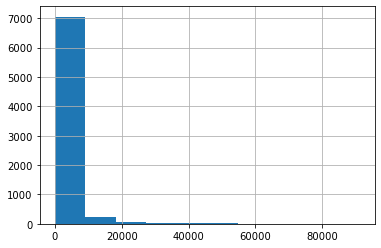

In [22]:
df.groupby('title')['rating'].count().to_frame()['rating'].hist()

In [23]:
# mean count 구하고 별점 높은 영화중 count 를 조절하여 자르자

In [24]:
ratings_df_mean = df.groupby('title')['rating'].mean()

In [25]:
ratings_df_count = df.groupby('title')['rating'].count()

In [26]:
ratings_df_mean = ratings_df_mean.to_frame()

In [27]:
ratings_df_mean.columns = ['mean']

In [28]:
ratings_df_count = ratings_df_count.to_frame()

In [29]:
ratings_df_count.columns = ['count']

In [30]:
ratings_mean_count_df = ratings_df_mean.join(ratings_df_count)

In [31]:
ratings_mean_count_df

,mean,count
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86
...,...,...
Ödipussi,3.458498,253
Şaban Oğlu Şaban,3.764228,123
Škola princů,3.750000,2


In [32]:
ratings_mean_count_df['count'].describe()

count     7409.000000
mean      1543.604805
std       5404.904779
min          1.000000
25%          7.000000
50%         45.000000
75%        485.000000
max      91082.000000
Name: count, dtype: float64

<AxesSubplot:>

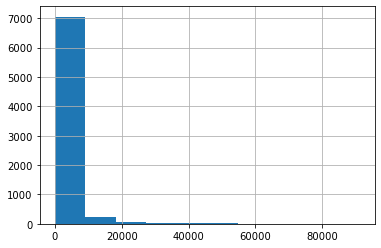

In [33]:
ratings_mean_count_df['count'].hist()

In [34]:
ratings_mean_count_df

,mean,count
title,,
!Women Art Revolution,2.802945,883
"$1,000 on the Black",3.000000,1
$5 a Day,2.246795,156
'Gator Bait,3.443590,195
'R Xmas,2.627907,86
...,...,...
Ödipussi,3.458498,253
Şaban Oğlu Şaban,3.764228,123
Škola princů,3.750000,2


In [35]:
ratings_mean_count_df = \
ratings_mean_count_df.loc[(ratings_mean_count_df['mean'] > 3) &
                          (ratings_mean_count_df['count'] > 5000) &
                          (ratings_mean_count_df['count'] < 12000), ]

In [36]:
ratings_mean_count_df

,mean,count
title,,
28 Days Later,3.216995,9438
300,3.726079,10357
7 Virgins,3.339387,6002
8 Women,3.634179,5679
88 Minutes,3.208466,10335
...,...,...
Yankee Doodle Dandy,3.461006,6283
Young Adam,3.219454,6744
Young Frankenstein,3.682266,5780


In [37]:
# 데이터 자른것의 영화만 df에서 가져오기

In [38]:
ratings_mean_count_df = ratings_mean_count_df.reset_index()

In [39]:
ratings_mean_count_df

,title,mean,count
0,28 Days Later,3.216995,9438
1,300,3.726079,10357
2,7 Virgins,3.339387,6002
3,8 Women,3.634179,5679
4,88 Minutes,3.208466,10335
...,...,...,...
254,Yankee Doodle Dandy,3.461006,6283
255,Young Adam,3.219454,6744
256,Young Frankenstein,3.682266,5780
257,Zatoichi,4.004338,11412


In [40]:
if :

SyntaxError: invalid syntax (Temp/ipykernel_13472/1317659341.py, line 1)

In [ ]:
df

In [ ]:
df = df.set_index('title').loc[ ratings_mean_count_df['title'].unique() , ].reset_index()

In [ ]:
df

In [ ]:
# df 피벗테이블 과 상관계수

In [ ]:
df_pivot = df.pivot_table(values='rating', index='userId', columns= 'title', aggfunc='mean')

In [ ]:
df_pivot

In [ ]:
df_corr = df_pivot.corr()

In [ ]:
df_corr

In [ ]:
df.to_csv('df.csv')
df_pivot.to_csv('df_pivot.csv')

In [ ]:
df_corr.to_csv('df_corr.csv')

In [ ]:
############################################################

In [ ]:
user_rating = pd.read_csv('data/user_rating.csv')

In [ ]:
user_rating

In [ ]:
# 내 영화 상관계수 하는 논리들

In [ ]:
user_rating['title'][0]

In [ ]:
df_user_corr = df_corr[user_rating['title'][0]].sort_values(ascending= False).to_frame()

In [ ]:
df_user_corr.columns = ['correlation']

In [ ]:
df_user_corr

In [ ]:
user_rating['rating'][0]

In [ ]:
df_user_corr['weight'] = user_rating['rating'][0] * df_user_corr['correlation']

In [ ]:
df_user_corr

In [ ]:
############################################################

In [ ]:
# 내가 영화에 준 별점을 상관계수에 채우는 작업

In [ ]:
user_rating

In [ ]:
similar_movies_list = pd.DataFrame()

for i in range( user_rating.shape[0] ) :
  movie_name = user_rating['title'][i]
  recom_movies = df_corr[movie_name].sort_values(ascending=False).to_frame()
  recom_movies.columns = ['correlation']
  recom_movies['weight'] = user_rating['rating'][i] * recom_movies['correlation']
  similar_movies_list = similar_movies_list.append( recom_movies )

In [ ]:
# 내 영화들 지우고 추천영화만 정렬해서 보여주는 작업

In [ ]:
similar_movies_list

In [ ]:
similar_movies_list = similar_movies_list.sort_values('weight' , ascending=False)
user_rating['title'].to_list()
similar_movies_list.drop( user_rating['title'].to_list() , axis=0,  inplace= True )

similar_movie = similar_movies_list.groupby('title')['weight'].max().sort_values(ascending = False).to_frame().reset_index()

similar_movie.loc[ : , 'title' ].to_frame().head(5)

In [ ]:
# 6/3 작업

In [108]:
import pandas as pd
df_corr = pd.read_csv('df_corr.csv', index_col=0)
user_rating = pd.read_csv('data/user_rating.csv', index_col= 0)

In [109]:
user_rating

,title,rating,userId
0,28 Days Later,3.0,999
1,300,5.0,999


In [110]:
df_corr

,28 Days Later,300,7 Virgins,8 Women,88 Minutes,A Bridge Too Far,A Close Shave,A Kiss Before Dying,A Perfect Murder,A Tale of Two Cities,...,What's New Pussycat?,While You Were Sleeping,Willy Wonka & the Chocolate Factory,Wish You Were Here,Within the Woods,Yankee Doodle Dandy,Young Adam,Young Frankenstein,Zatoichi,xXx
title,,,,,,,,,,,,,,,,,,,,,
28 Days Later,1.000000,0.189100,0.214053,0.110950,0.296684,0.014497,0.137849,0.341978,0.103624,0.339376,...,0.078391,0.080935,0.316099,0.156420,0.086543,0.210222,0.279453,0.203146,0.006954,0.186320
300,0.189100,1.000000,0.153035,0.393691,0.320768,0.118686,0.153659,0.130509,0.091131,0.200073,...,0.168064,0.188818,0.257048,0.261245,0.137678,0.195374,0.270513,0.281256,0.115508,0.173415
7 Virgins,0.214053,0.153035,1.000000,0.201602,0.180496,0.213251,0.229352,0.322558,0.211946,0.194455,...,0.154537,0.170352,0.187914,0.272589,0.191204,0.174086,0.182075,0.222384,0.121469,0.115104
8 Women,0.110950,0.393691,0.201602,1.000000,0.150919,0.180756,0.111424,0.194514,0.094293,0.178048,...,0.130355,0.198973,0.148738,0.178505,0.156882,0.143749,0.225076,0.258531,0.185540,0.214417
88 Minutes,0.296684,0.320768,0.180496,0.150919,1.000000,0.045695,0.094595,0.253203,0.061813,0.346692,...,0.069738,0.067352,0.393844,0.230593,0.042947,0.296615,0.354789,0.345558,-0.038943,0.243593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yankee Doodle Dandy,0.210222,0.195374,0.174086,0.143749,0.296615,0.086264,0.159409,0.194484,0.127682,0.224691,...,0.160776,0.091121,0.222833,0.218490,0.127338,1.000000,0.199108,0.265369,0.099752,0.197308
Young Adam,0.279453,0.270513,0.182075,0.225076,0.354789,0.083626,0.112623,0.236140,0.056565,0.430057,...,0.220426,0.079497,0.384634,0.290240,0.133239,0.199108,1.000000,0.324355,0.053825,0.177691
Young Frankenstein,0.203146,0.281256,0.222384,0.258531,0.345558,0.202837,0.135093,0.162884,0.158284,0.252163,...,0.313075,0.142830,0.278479,0.213465,0.239771,0.265369,0.324355,1.000000,0.244995,0.182261


In [ ]:
# 한개씩 드랍하는 논리
# 인덱스를 넣어서 그인덱스값 추출해서 drop

In [111]:
list(user_rating['title'].values)

['28 Days Later', '300']

In [112]:
list(enumerate(['A']))

[(0, 'A')]

In [113]:
a = list(enumerate(user_rating['title'].values))

In [114]:
a

[(0, '28 Days Later'), (1, '300')]

In [115]:
a[0]

(0, '28 Days Later')

In [116]:
a[0][0]

0

In [117]:
user_rating.drop(index= 1
        , axis=0)

,title,rating,userId
0,28 Days Later,3.0,999


In [ ]:
##############################################################

In [ ]:
# overview df 만들기

In [67]:
df_overview = pd.read_csv('data/movies_metadata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
df_overview = df_overview[['overview', 'title']]

In [43]:
df_overview

,overview,title
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,When siblings Judy and Peter discover an encha...,Jumanji
2,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,Just when George Banks has recovered from his ...,Father of the Bride Part II
...,...,...
45461,Rising and falling between a man and woman.,Subdue
45462,An artist struggles to finish his work while a...,Century of Birthing
45463,"When one of her hits goes wrong, a professiona...",Betrayal
45464,"In a small town live two brothers, one a minis...",Satan Triumphant


In [77]:
df_overview.isnull().sum()

title       0
overview    0
dtype: int64

In [71]:
df_overview['title'] = df_overview['title'].dropna()

In [78]:
df_overview.nunique()

title       259
overview    258
dtype: int64

In [69]:
df_overview = df_overview.drop_duplicates('title')

In [73]:
df_overview

,overview,title
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,When siblings Judy and Peter discover an encha...,Jumanji
2,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,Just when George Banks has recovered from his ...,Father of the Bride Part II
...,...,...
45459,It's the year 3000 AD. The world's most danger...,Caged Heat 3000
45461,Rising and falling between a man and woman.,Subdue
45462,An artist struggles to finish his work while a...,Century of Birthing
45464,"In a small town live two brothers, one a minis...",Satan Triumphant


In [75]:
df_overview = df_overview.set_index('title').loc[ ratings_mean_count_df['title'].unique() , ].reset_index()

In [91]:
df_overview

,title,overview
0,28 Days Later,Twenty-eight days after a killer virus was acc...
1,300,"Based on Frank Miller's graphic novel, ""300"" i..."
2,7 Virgins,Tano is 16-years-old and is already sitting in...
3,8 Women,Eight women gather to celebrate Christmas in a...
4,88 Minutes,"""88 Minutes"" focuses on a college professor (P..."
...,...,...
254,Yankee Doodle Dandy,A film of the life of the renowned musical com...
255,Young Adam,A young drifter working on a river barge disru...
256,Young Frankenstein,A young neurosurgeon inherits the castle of hi...
257,Zatoichi,Zatôichi is a 19th century blind nomad who mak...


In [90]:
df_overview.loc[df_overview.duplicated(['overview'], keep=False) ]

,title,overview
90,Guter Junge,No overview found.
99,Hotel Very Welcome,No overview found.


In [96]:
( df_overview.set_index('title') )

,overview
title,
28 Days Later,Twenty-eight days after a killer virus was acc...
300,"Based on Frank Miller's graphic novel, ""300"" i..."
7 Virgins,Tano is 16-years-old and is already sitting in...
8 Women,Eight women gather to celebrate Christmas in a...
88 Minutes,"""88 Minutes"" focuses on a college professor (P..."
...,...
Yankee Doodle Dandy,A film of the life of the renowned musical com...
Young Adam,A young drifter working on a river barge disru...
Young Frankenstein,A young neurosurgeon inherits the castle of hi...


In [102]:
df_overview.set_index('title').loc['28 Days Later'][0]

"Twenty-eight days after a killer virus was accidentally unleashed from a British research facility, a small group of London survivors are caught in a desperate struggle to protect themselves from the infected. Carried by animals and humans, the virus turns those it infects into homicidal maniacs -- and it's absolutely impossible to contain."

In [103]:
df_overview.to_csv('df_overview.csv')

In [ ]:
##############################################################